In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from collections import Counter
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
print(df.shape)
print(test_df.shape)

(595212, 59)
(892816, 58)


In [16]:
columns = list(df.columns)
print('columns: ', columns)
targets = df['target']
columns.remove('id')
columns.remove('target')
true_target_index = []
false_target_index = []
for i in range(len(targets)):
    if targets[i] == 1:
        true_target_index.append(i)
    else:
        false_target_index.append(i)
features = {}
false_features = {}
for column in columns:
    features[column] = np.take(list(df[column]), true_target_index)
    false_features[column] = np.random.choice(np.take(list(df[column]), false_target_index), 10000)

columns:  ['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']


In [17]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n
    
    return x, y

In [18]:
def plot_ecdf(column_name, true_f, false_f):
    # Compute ECDF for versicolor data: x_vers, y_vers
    x_true, y_true = ecdf(true_f[column_name])

    # Generate plot
    _ = plt.plot(x_true, y_true, marker = '.', linestyle = '-', color='green', alpha=1.0)
    
    x_false, y_false = ecdf(false_f[column_name])
    
    _ = plt.plot(x_false, y_false, marker = '.', linestyle = '-', color='red', alpha=0.1)

    # Make the margins nice
    _ = plt.margins(0.02)
    
    # Label the axes
    _ = plt.xlabel(column_name)
    _ = plt.ylabel('ECDF')
    _ = plt.legend


    # Display the plot
    plt.show()

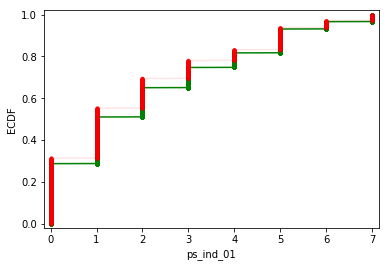

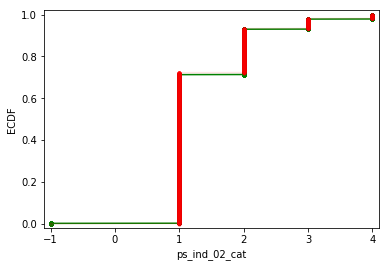

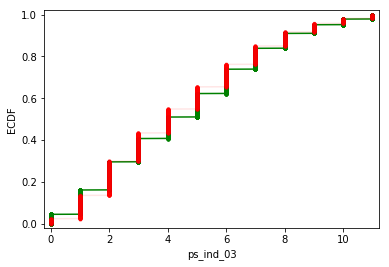

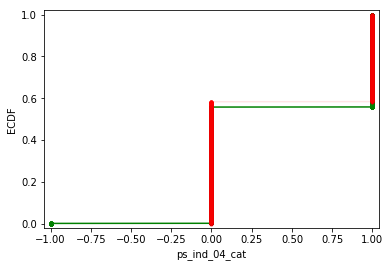

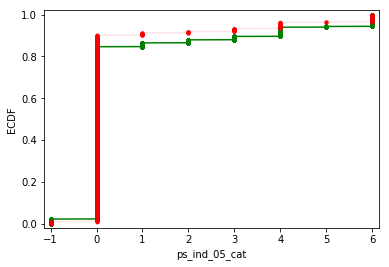

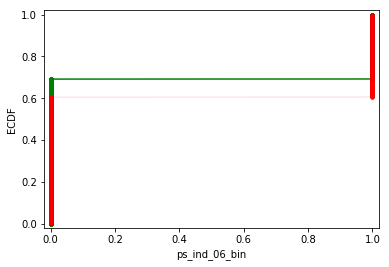

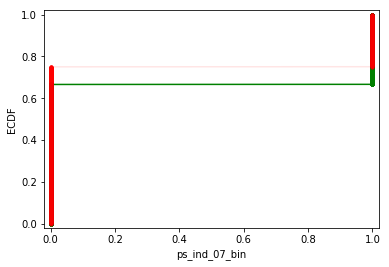

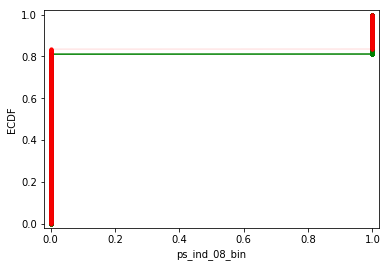

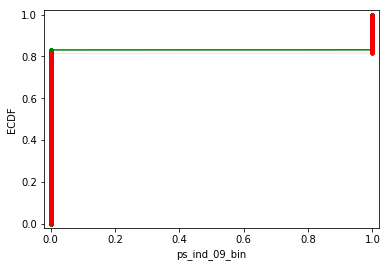

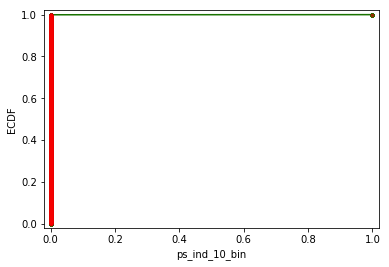

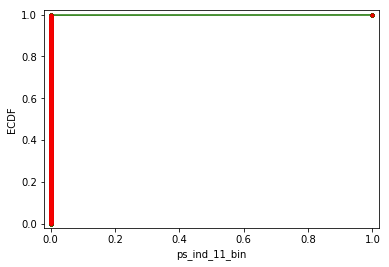

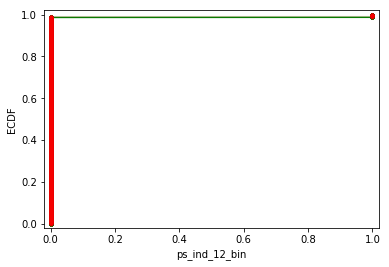

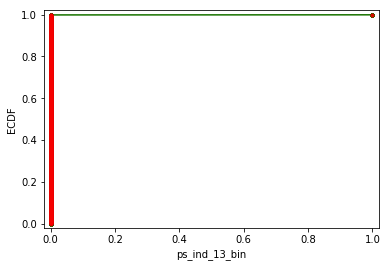

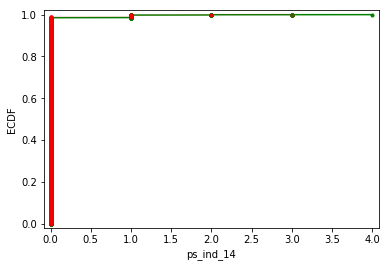

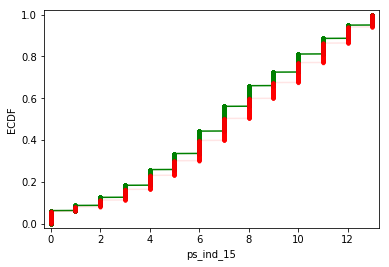

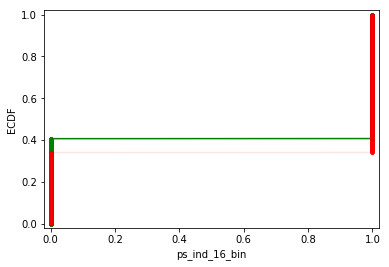

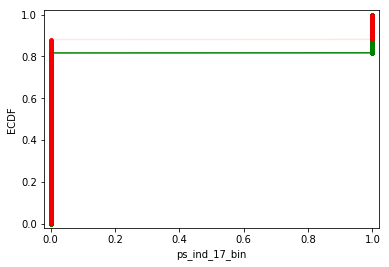

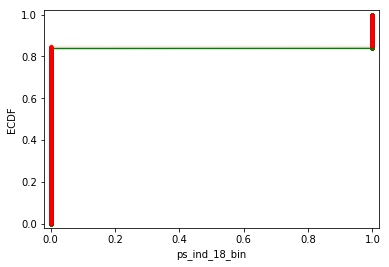

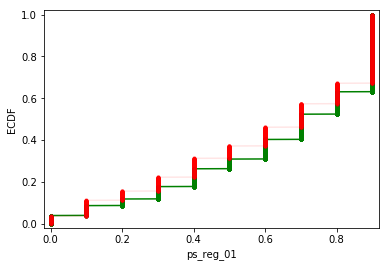

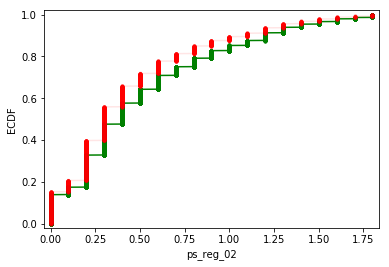

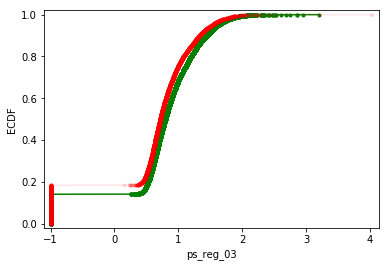

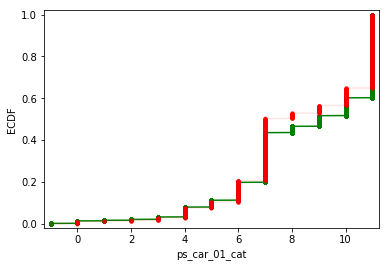

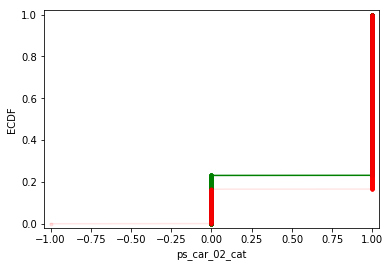

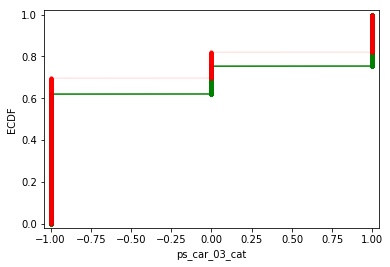

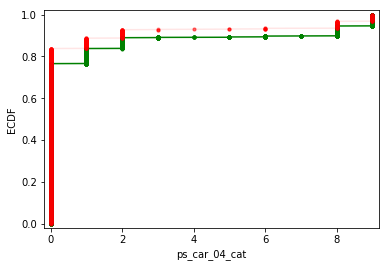

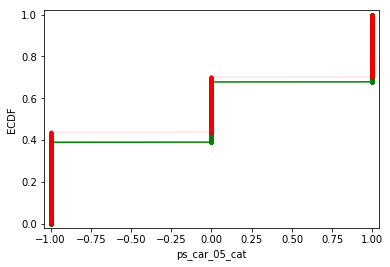

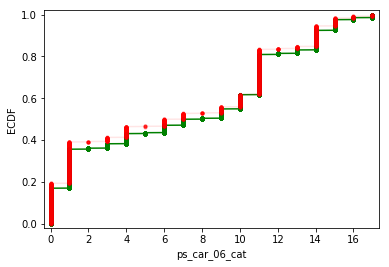

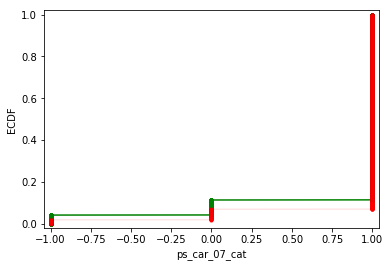

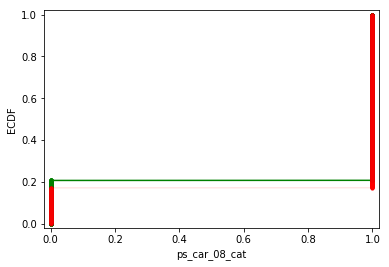

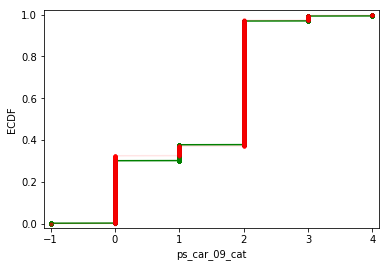

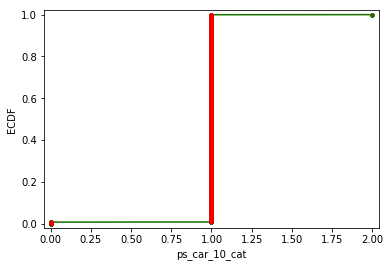

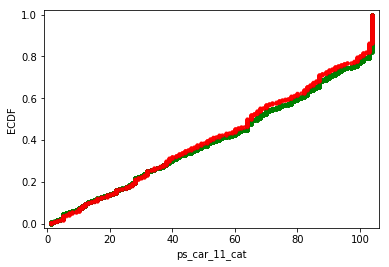

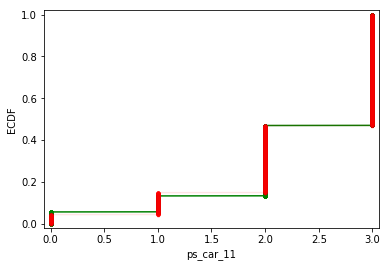

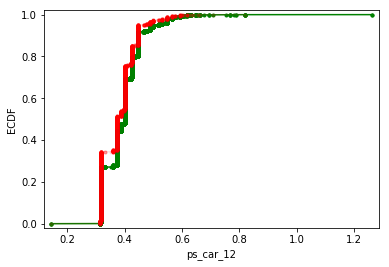

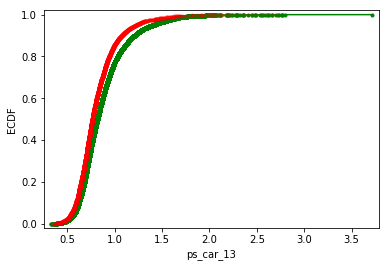

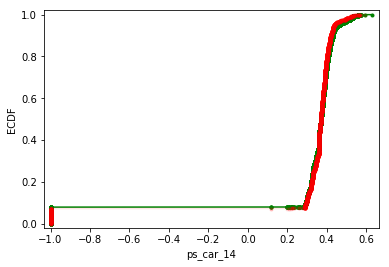

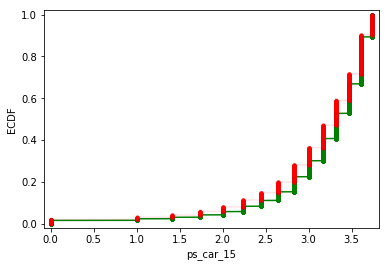

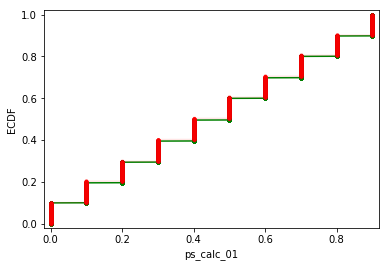

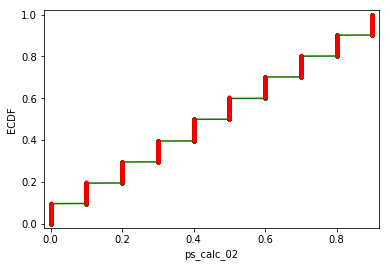

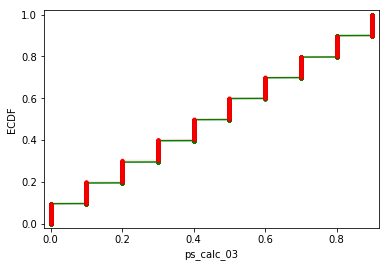

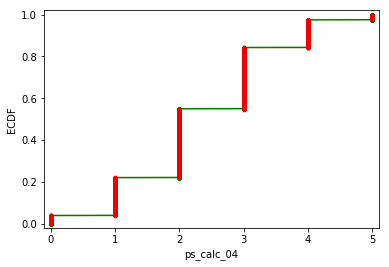

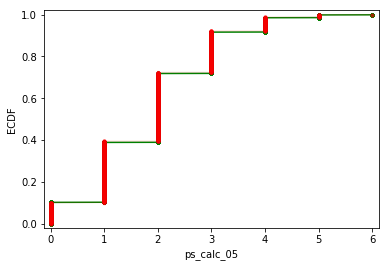

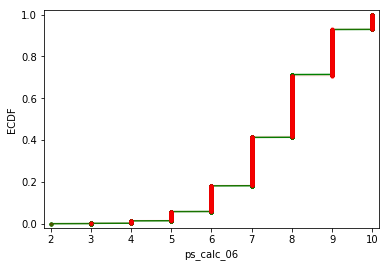

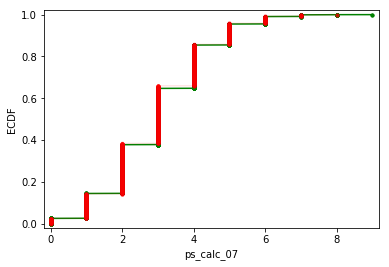

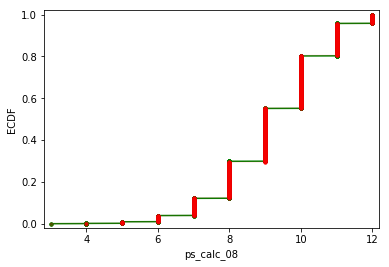

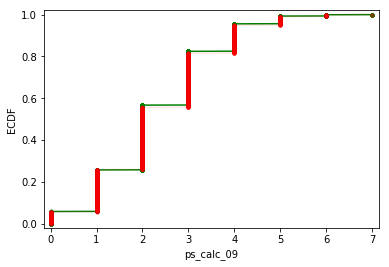

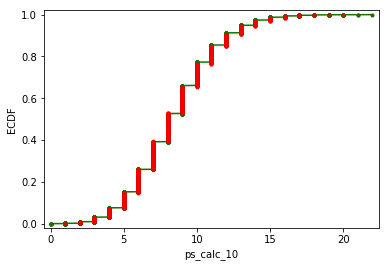

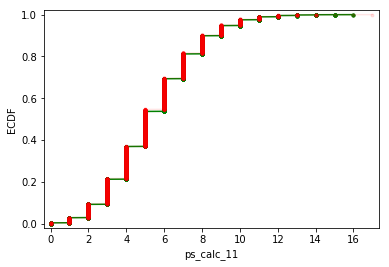

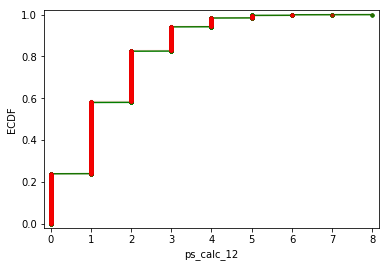

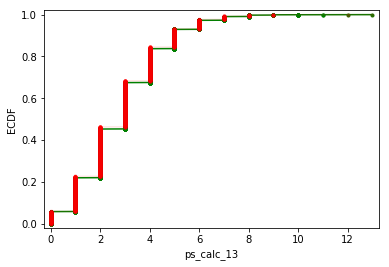

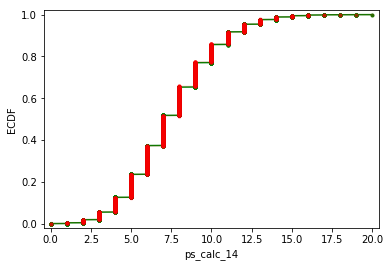

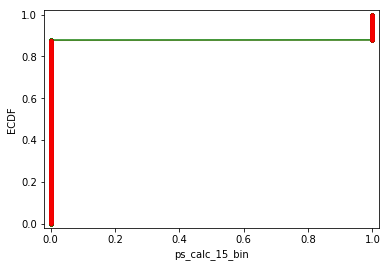

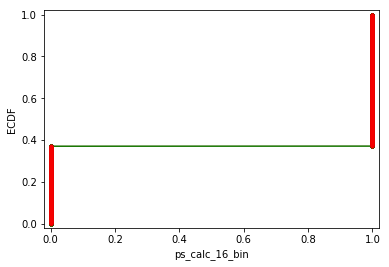

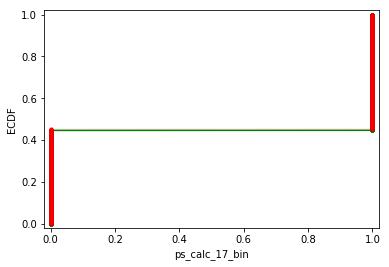

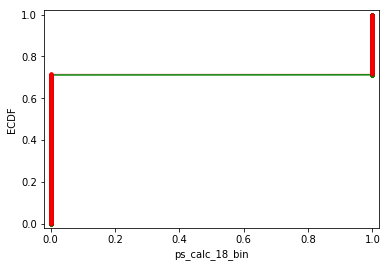

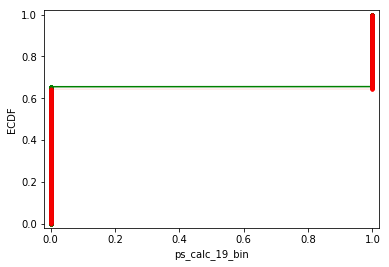

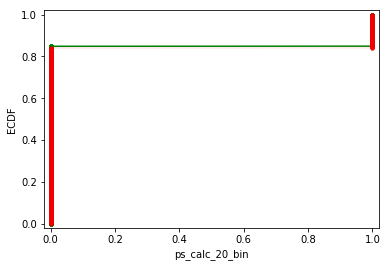

In [19]:
for column in columns:
    plot_ecdf(column, features, false_features)

In [20]:
diff_columns = ['ps_ind_01','ps_ind_03','ps_ind_05_cat','ps_ind_06_bin','ps_ind_07_bin','ps_ind_15','ps_ind_16_bin','ps_ind_17_bin','ps_reg_01','ps_reg_02','ps_reg_03',
'ps_car_01_cat','ps_car_02_cat','ps_car_03_cat','ps_car_04_cat','ps_car_05_cat','ps_car_06_cat','ps_car_07_cat','ps_car_08_cat','ps_car_09_cat','ps_car_11_cat','ps_car_12','ps_car_13','ps_car_15']
diff_features = {}
diff_false_features = {}
for column in diff_columns:
    diff_features[column] = features[column]
    diff_false_features[column] = false_features[column]

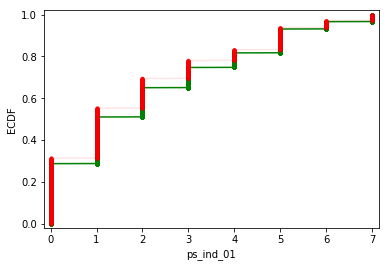

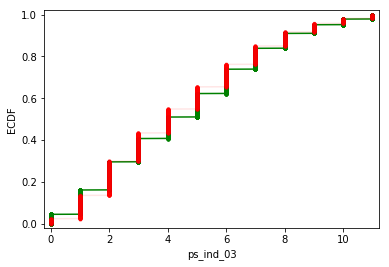

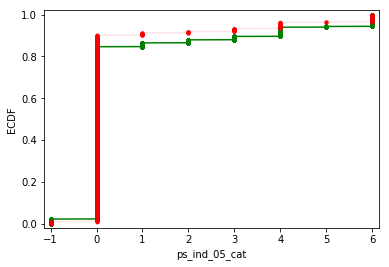

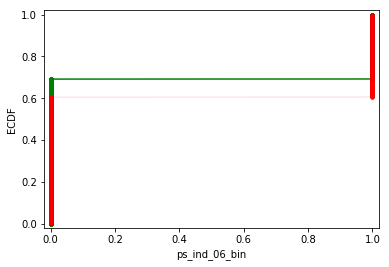

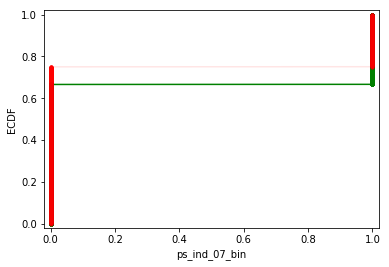

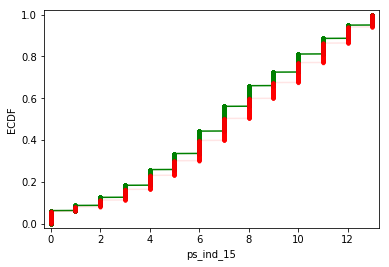

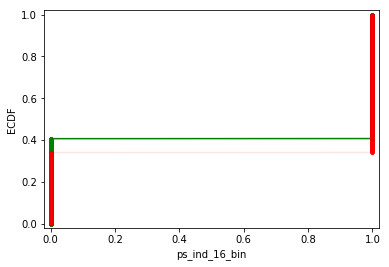

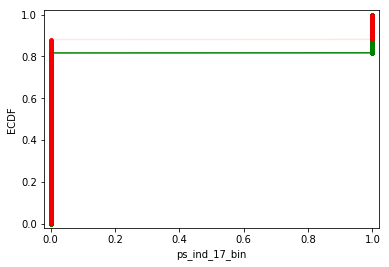

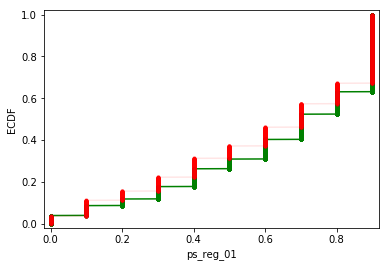

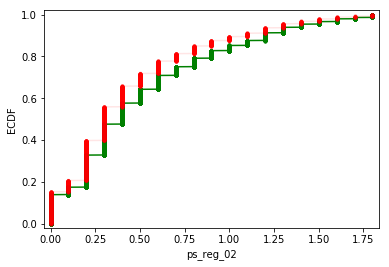

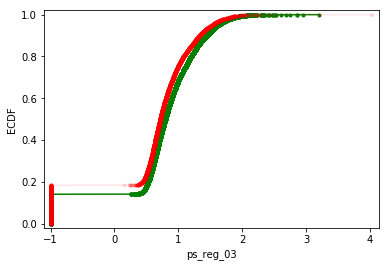

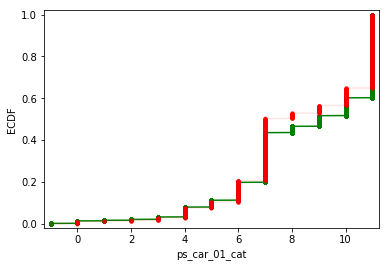

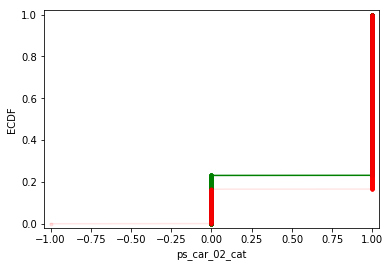

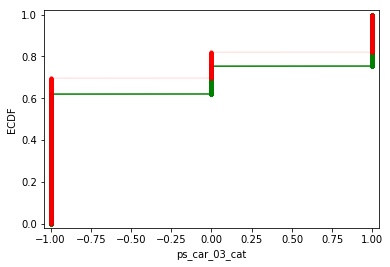

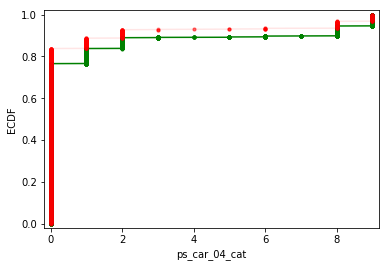

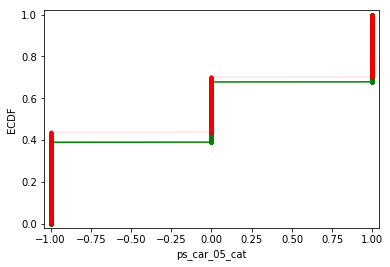

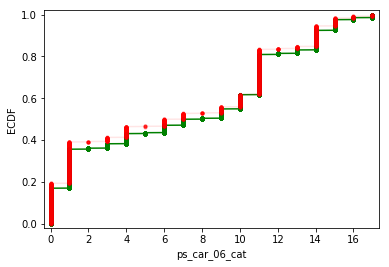

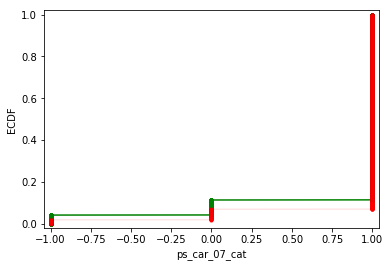

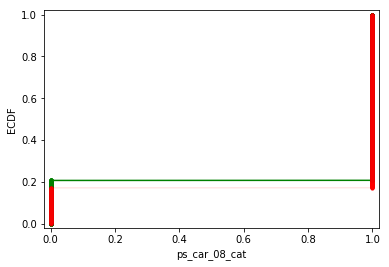

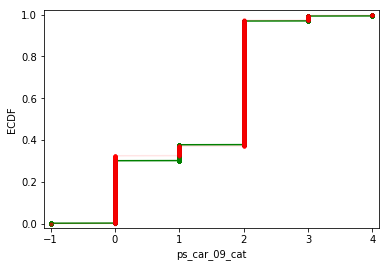

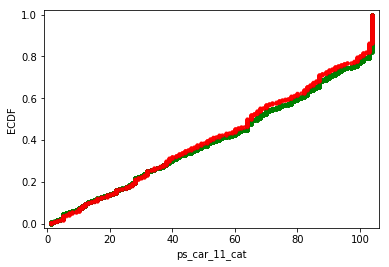

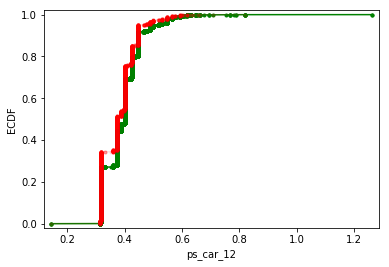

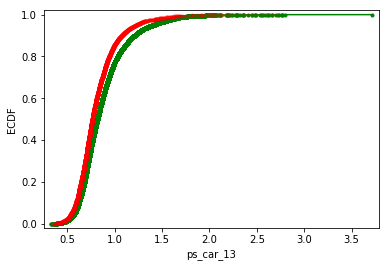

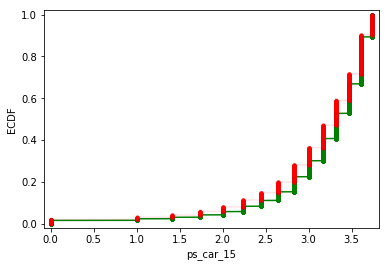

In [21]:
for column in diff_columns:
    plot_ecdf(column, diff_features, diff_false_features)

In [22]:
correlation_matrix = df.corr()
correlation_matrix

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,1.000000,-0.000188,0.000826,0.001646,-0.001307,0.000168,0.000022,-0.000093,0.002473,-0.000479,...,-0.001249,-0.001093,-0.000157,0.001609,-0.001227,-0.001412,-0.001267,-0.001387,0.000194,-0.001267
target,-0.000188,1.000000,0.018570,0.004534,0.008360,0.009360,0.029165,-0.034017,0.034218,0.013147,...,0.000371,-0.001133,-0.000446,0.001362,-0.000490,0.000624,-0.000170,0.000552,-0.001744,-0.001072
ps_ind_01,0.000826,0.018570,1.000000,-0.001793,0.223408,0.066645,0.014823,-0.277458,0.005700,0.188583,...,-0.001263,0.001521,0.000199,-0.000891,-0.000397,-0.000012,-0.000868,-0.001504,-0.000162,-0.001464
ps_ind_02_cat,0.001646,0.004534,-0.001793,1.000000,-0.061189,0.147110,-0.014860,-0.125653,0.016398,0.030945,...,0.000038,-0.000884,-0.000893,-0.000519,-0.000109,0.000920,0.000547,0.000824,0.000367,-0.002070
ps_ind_03,-0.001307,0.008360,0.223408,-0.061189,1.000000,-0.095856,0.053250,-0.045158,-0.060368,0.014037,...,-0.002716,-0.002352,0.000133,0.000205,0.000134,-0.000744,0.000158,-0.000218,-0.000882,-0.003709
ps_ind_04_cat,0.000168,0.009360,0.066645,0.147110,-0.095856,1.000000,0.013053,-0.297737,0.304949,0.044978,...,-0.002001,-0.000814,0.000283,0.001565,0.002735,0.002295,0.000773,0.000916,-0.001966,0.001244
ps_ind_05_cat,0.000022,0.029165,0.014823,-0.014860,0.053250,0.013053,1.000000,0.009619,-0.010382,0.004881,...,-0.001525,0.000975,0.001549,0.002171,0.001548,-0.000368,0.000153,0.000032,0.000276,0.000279
ps_ind_06_bin,-0.000093,-0.034017,-0.277458,-0.125653,-0.045158,-0.297737,0.009619,1.000000,-0.474009,-0.356838,...,0.000822,0.001347,-0.001301,0.000304,0.002088,-0.000381,-0.000001,-0.000759,0.002791,0.000203
ps_ind_07_bin,0.002473,0.034218,0.005700,0.016398,-0.060368,0.304949,-0.010382,-0.474009,1.000000,-0.260438,...,-0.000448,-0.001044,0.000541,0.001666,0.000575,0.001220,-0.000517,0.000181,-0.001361,-0.000961
ps_ind_08_bin,-0.000479,0.013147,0.188583,0.030945,0.014037,0.044978,0.004881,-0.356838,-0.260438,1.000000,...,-0.000632,-0.001241,-0.000432,-0.001959,-0.002782,-0.002048,-0.000579,-0.000068,-0.000919,0.000995


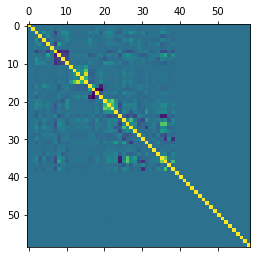

In [23]:
_ = plt.matshow(correlation_matrix)
plt.show()

In [24]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]


quantitative_diff_columns = ['ps_ind_01','ps_ind_03','ps_ind_15','ps_reg_01','ps_reg_02','ps_reg_03','ps_car_12','ps_car_13','ps_car_15']
for column in quantitative_diff_columns:
    # Compute Pearson correlation coefficient for I. versicolor: r
    r = pearson_r(df[column], df['target'])

    # Print the result
    print(column, ' pearson r: ', r)


ps_ind_01  pearson r:  0.0185702586575
ps_ind_03  pearson r:  0.00835959030266
ps_ind_15  pearson r:  -0.0215062216879
ps_reg_01  pearson r:  0.0228880444404
ps_reg_02  pearson r:  0.0348000208099
ps_reg_03  pearson r:  0.0308881048331
ps_car_12  pearson r:  0.0387898276614
ps_car_13  pearson r:  0.0538987794848
ps_car_15  pearson r:  0.0276672810273


In [55]:
true_target_index_sampled = np.random.choice(true_target_index, len(false_target_index))

In [58]:
from collections import Counter
def chi_square_for_column(column):
    true_dict = {}
    for i in true_target_index:
        key = df[column][i]
        if key not in true_dict:
            true_dict[key] = 0
        true_dict[key] = true_dict[key] + 1
    false_dict = {}
    for i in false_target_index:
        key = df[column][i]
        if key not in false_dict:
            false_dict[key] = 0
        false_dict[key] = false_dict[key] + 1
    obs = []
    exp = []
    for key in sorted(true_dict.keys()):
        obs.append(true_dict[key])
        exp.append(false_dict[key])
    return stats.chi2_contingency([obs, exp], correction=False)

In [59]:
nominal_diff_columns = ['ps_ind_05_cat','ps_ind_06_bin','ps_ind_07_bin','ps_ind_15','ps_ind_16_bin','ps_ind_17_bin','ps_car_01_cat','ps_car_02_cat','ps_car_03_cat','ps_car_04_cat','ps_car_05_cat','ps_car_06_cat','ps_car_07_cat','ps_car_08_cat','ps_car_09_cat','ps_car_11_cat']
for column in nominal_diff_columns:
    chi2, p, dof, ex = chi_square_for_column(column)
    print(column, '\nchi2: ', chi2, '\np: ', p, '\ndof: ', dof, '\nexpected: ', ex)

ps_ind_05_cat 
chi2:  1128.72527799 
p:  1.81829438219e-239 
dof:  7 
expected:  [[  2.11723631e+02   1.92446175e+04   3.03316244e+02   1.52496415e+02
    3.00072415e+02   6.68593268e+02   6.01019569e+01   7.53078614e+02]
 [  5.59727637e+03   5.08764383e+05   8.01868376e+03   4.03150359e+03
    7.93292759e+03   1.76754067e+04   1.58889804e+03   1.99089214e+04]]
ps_ind_06_bin 
chi2:  688.748032799 
p:  8.36655285187e-152 
dof:  1 
expected:  [[  13152.15971452    8541.84028548]
 [ 347699.84028548  225818.15971452]]
ps_ind_07_bin 
chi2:  696.919816799 
p:  1.3980166027e-153 
dof:  1 
expected:  [[  16117.93069024    5576.06930976]
 [ 426105.06930976  147412.93069024]]
ps_ind_15 
chi2:  334.553739053 
p:  1.36989070307e-63 
dof:  13 
expected:  [[  1159.97870339    423.41081497    680.65739602   1176.05205876
    1522.41282098   1550.95122746   2128.82662312   2381.33502685
    2172.27206441   1658.25272004   1980.59456799   1939.55466288
    1634.7076235    1284.99368964]
 [ 30666.021296

In [63]:
chi2, p, dof, ex = chi_square_for_column('ps_ind_11_bin')
print('ps_ind_11_bin', '\nchi2: ', chi2, '\np: ', p, '\ndof: ', dof, '\nexpected: ', ex)
chi2, p, dof, ex = chi_square_for_column('ps_ind_02_cat')
print('ps_ind_02_cat', '\nchi2: ', chi2, '\np: ', p, '\ndof: ', dof, '\nexpected: ', ex)

ps_ind_11_bin 
chi2:  2.44839164851 
p:  0.117645355928 
dof:  1 
expected:  [[  2.16572973e+04   3.67026505e+01]
 [  5.72547703e+05   9.70297350e+02]]
ps_ind_02_cat 
chi2:  159.122932131 
p:  2.25435172859e-33 
dof:  4 
expected:  [[  7.87266386e+00   1.57401886e+04   4.50392912e+03   1.02730974e+03
    4.14699858e+02]
 [  2.08127336e+02   4.16118811e+05   1.19069071e+05   2.71586903e+04
    1.09633001e+04]]
